In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


rng = np.random.RandomState(0)
N = 100
X = np.linspace(0, 6, N)[:, np.newaxis]
error = 0.4
y_true = np.sin(X).ravel() + np.sin(6 * X).ravel()
y_noisy = y_true + rng.normal(0, error, X.shape[0])

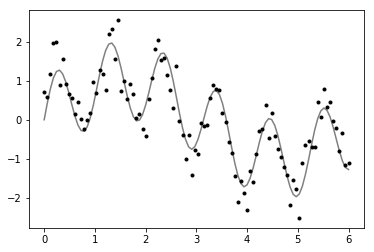

In [5]:
plt.plot(X.ravel(), y_true, color='gray')
plt.plot(X.ravel(), y_noisy, '.k')

In [6]:
i = np.random.permutation(X.shape[0])
X = X[i]
y_noisy = y_noisy[i]

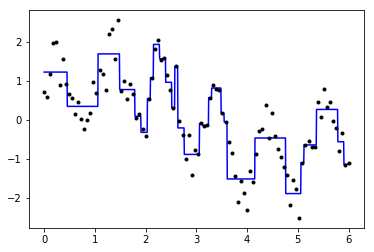

In [8]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y_noisy)

X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_1 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_1, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

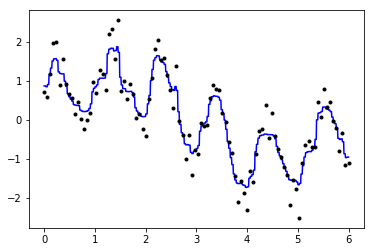

In [9]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200, max_depth=5)
clf.fit(X, y_noisy)

y_fit_200 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_200, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

In [13]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {'n_estimators':[200, 300, 400],
              'max_depth':[5, 7, 9]}

# Warning: be sure your data is shuffled before using GridSearch!
clf_grid = GridSearchCV(rf, parameters)
clf_grid.fit(X, y_noisy)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 400], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

300 7


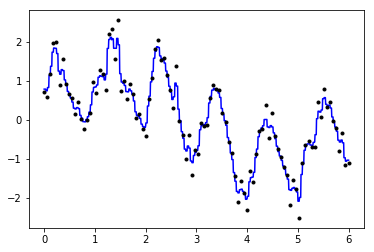

In [15]:
rf_best = clf_grid.best_estimator_
X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_best = rf_best.predict(X_fit)

print(rf_best.n_estimators, rf_best.max_depth)

plt.plot(X_fit.ravel(), y_fit_best, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

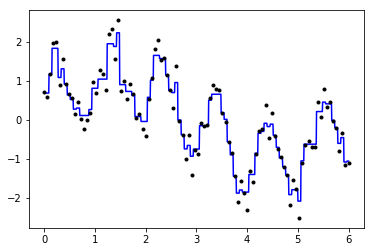

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=200, max_depth=2)
clf.fit(X, y_noisy)

y_fit_200 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_200, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')